In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
# Classification - Iris

In [ ]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target


In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)


DecisionTreeClassifier(random_state=42)

In [ ]:
train_acc = clf.score(X_train_c, y_train_c)
test_acc = clf.score(X_test_c, y_test_c)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 1.00


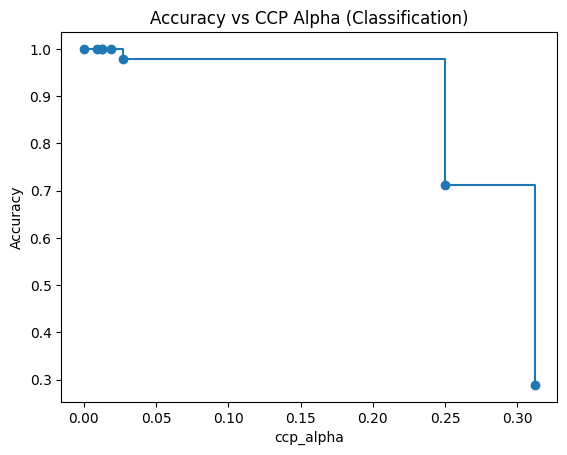

In [ ]:
path = clf.cost_complexity_pruning_path(X_train_c, y_train_c)
ccp_alphas = path.ccp_alphas
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train_c, y_train_c) for alpha in ccp_alphas]

test_scores = [clf.score(X_test_c, y_test_c) for clf in clfs]
plt.figure()
plt.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha (Classification)")
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_c, y_train_c)
print("Random Forest Accuracy:", rf_clf.score(X_test_c, y_test_c))

Random Forest Accuracy: 1.0


In [ ]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_clf = AdaBoostClassifier(estimator=stump, n_estimators=50, random_state=42)
ada_clf.fit(X_train_c, y_train_c)
print("AdaBoost Accuracy:", ada_clf.score(X_test_c, y_test_c))

AdaBoost Accuracy: 1.0


In [ ]:
# Regression - Housing

In [ ]:
housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)


DecisionTreeRegressor(random_state=42)

In [ ]:
train_mse = mean_squared_error(y_train_r, reg.predict(X_train_r))
test_mse = mean_squared_error(y_test_r, reg.predict(X_test_r))
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

Training MSE: 0.00
Testing MSE: 0.53


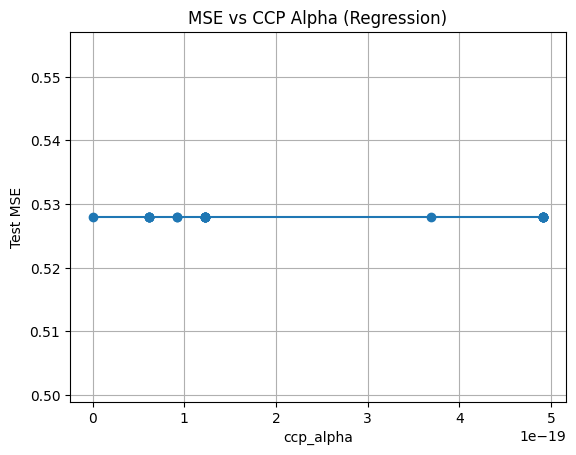

In [ ]:
limited_alphas = ccp_alphas_r[:25]
regs = [DecisionTreeRegressor(random_state=42, ccp_alpha=alpha).fit(X_train_r, y_train_r) for alpha in limited_alphas]

test_mses = [mean_squared_error(y_test_r, reg.predict(X_test_r)) for reg in regs]

plt.figure()
plt.plot(limited_alphas, test_mses, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Test MSE")
plt.title("MSE vs CCP Alpha (Regression)")
plt.grid(True)
plt.show()

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_r, y_train_r)
print("Random Forest R2 Score:", r2_score(y_test_r, rf_reg.predict(X_test_r)))


Random Forest R2 Score: 0.8045734925119942


In [ ]:
stump_r = DecisionTreeRegressor(max_depth=1, random_state=42)
ada_reg = AdaBoostRegressor(estimator=stump_r, n_estimators=50, random_state=42)
ada_reg.fit(X_train_r, y_train_r)
print("AdaBoost R2 Score:", r2_score(y_test_r, ada_reg.predict(X_test_r)))

AdaBoost R2 Score: 0.3193070984729467
